In [1]:
import re
import sys
from time import time, sleep
from pprint import pprint
from functools import partial
from multiprocessing import Pool

import numpy as np
import pandas as pd
import optuna
import matplotlib.pyplot as plt

FILENAME = "main.cpp"

In [2]:
!cp ../answer/main.cpp ./{FILENAME}

In [3]:
!g++ {FILENAME} -std=gnu++17 -Wall -Wextra -O2 -DONLINE_JUDGE -o {FILENAME}.out

main.cpp:49: warning: ignoring #pragma clang attribute [-Wunknown-pragmas]
   49 | #pragma clang attribute push (__attribute__((target("arch=skylake"))),apply_to=function)
      | 
main.cpp:1463: warning: ignoring #pragma clang attribute [-Wunknown-pragmas]
 1463 | #pragma clang attribute pop
      | 
main.cpp: In function ‘void globals::UpdateValueTable()’:
main.cpp:857:15: warning: unused variable ‘vm’ [-Wunused-variable]
  857 |   const auto& vm = v_modified[idx_RCSEV];
      |               ^~
main.cpp: In function ‘void Solve()’:
main.cpp:1325:72: warning: missing initializer for member ‘Solve()::Node::action’ [-Wmissing-field-initializers]
 1325 |   node_buffer.push({ state_buffer[0].score, nullptr, &state_buffer[0] });
      |                                                                        ^
main.cpp:1369:19: warning: unused variable ‘cum_base_sec’ [-Wunused-variable]
 1369 |     static double cum_base_sec = 0.0;
      |                   ^~~~~~~~~~~~
main.cpp:1371:16: wa

In [3]:
N_TESTCASES = 200
TESTCASE_DIRECTORY = "../exp005_optim_fix_cancellation_and_subscore3/in/"
TESTCASES = [f"{i:04d}.txt" for i in range(N_TESTCASES)]

In [5]:
scores = []
times = []

!mkdir out
!mkdir time

def parallel(i):
    testcase = TESTCASES[i]
    i = f"{i:04d}"
    t0 = time()
    !./{FILENAME}.out < {TESTCASE_DIRECTORY}{testcase} > ./out/{testcase} 2> ./time/{testcase}
    t = time() - t0
    score = !python3 ../A/tester/judge.py {TESTCASE_DIRECTORY}{testcase} ./out/{testcase}
    print(i, f"time:{t:.4f}", *score)
    score = int(score[0].split(":")[-1])
    return score, t

with Pool(15) as p:
    for score, t in p.map(parallel, range(N_TESTCASES)):
        scores.append(score)
        times.append(t)

np.mean(scores) * 50 / 1e6, np.std(scores) * 50 / 1e6

00400056 time:8.1298 time:8.0553 0008  score:4254398score:4792872

time:8.2561 score:5382660
0020 time:8.2092 score:4699695
0024 time:8.5063 score:5130938
0004 time:8.5577 score:4595307
0012 time:8.9058 score:44729230044 
time:9.0734 score:5142329
0016 time:9.1880 score:5079234
00520036  time:9.3448time:9.39510028   score:4529382score:5846607time:9.5947

 score:5069833
00480000  time:9.5731time:9.5909  0032score:4586927score:4903030 

time:9.5740 score:5450502
0041 time:7.7690 score:4530063
0021 time:8.2977 0057score:5016936 
time:8.5370 score:5371250
0025 time:8.7604 score:46879520009
 time:9.1208 score:49145040033
 time:7.7544 0005score:4156374
 time:8.6698 score:51388460053
 time:8.2647 00450013score:4589162 
 time:8.8056time:8.5915  score:5178430score:52728290017

 time:8.6864 score:4503560
0029 time:8.3311 score:5236158
0049 time:8.6235 score:4946309
0037 time:9.1551 score:4900387
0001 time:10.3519 score:5355210
0058 time:7.0662 score:4748391
0022 time:7.2795 score:4723686
0042 ti

(248.16697825000003, 17.78923519055877)

In [4]:
times_sum = np.zeros(1000)
for testcase in TESTCASES:
    times = !cat ./time/{testcase}
    times = np.array(list(map(float, " ".join(times).strip().split())))
    times_sum += times
times_mean = times_sum / N_TESTCASES

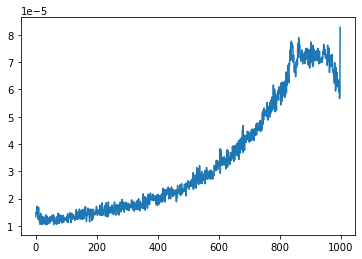

In [5]:
plt.plot(times_mean[1:])

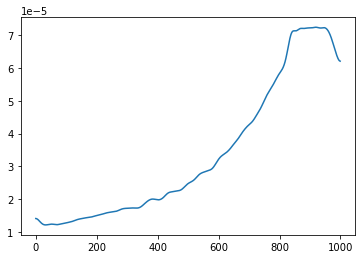

In [6]:
import scipy.signal
import scipy.ndimage
med = scipy.signal.medfilt(times_mean, 3)
#plt.plot(med)
med = scipy.ndimage.filters.gaussian_filter(med, 10.0)
plt.plot(med)

In [9]:
print(*np.round(med * 1e9).astype(int).tolist(), sep=",")

14048,14035,14011,13974,13927,13869,13801,13725,13641,13551,13456,13358,13257,13156,13055,12955,12858,12765,12676,12593,12516,12445,12380,12323,12272,12229,12192,12161,12137,12119,12106,12098,12095,12095,12100,12108,12119,12132,12147,12164,12181,12200,12218,12236,12254,12271,12286,12299,12311,12320,12327,12331,12332,12330,12325,12318,12309,12297,12284,12269,12253,12238,12222,12208,12195,12184,12175,12170,12167,12168,12172,12180,12191,12204,12221,12240,12261,12283,12306,12330,12354,12377,12400,12422,12443,12463,12481,12499,12516,12532,12547,12563,12578,12593,12609,12625,12642,12659,12678,12697,12716,12736,12757,12778,12799,12821,12842,12863,12885,12906,12928,12949,12971,12993,13016,13039,13063,13088,13115,13142,13171,13201,13233,13266,13300,13335,13371,13407,13444,13480,13517,13553,13588,13622,13655,13687,13717,13746,13773,13798,13823,13846,13867,13888,13908,13928,13947,13965,13984,14002,14021,14039,14058,14076,14095,14114,14132,14150,14168,14185,14202,14218,14234,14249,14263,14276,1428